In [44]:
pip install plotly pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import pandas as pd
import plotly.express as px

In [46]:
#LOAD DATASET
data=pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

In [47]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [48]:
#CHECKING FOR NULL VALUES
data.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [49]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [50]:
data['Mental_Health_Condition']=data['Mental_Health_Condition'].fillna("unknown")
data['Physical_Activity']=data['Physical_Activity'].fillna("unkonown")

In [51]:
data.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

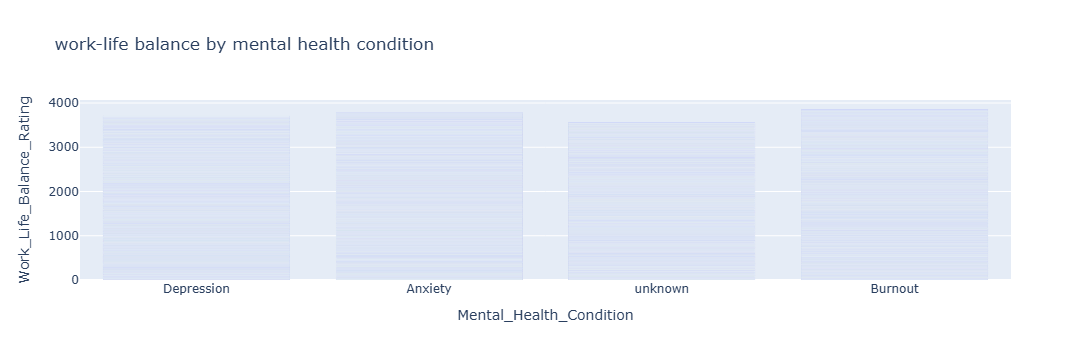

In [52]:
# AN INTERACTIVE BAR CHART WORK-LIFE BALANCE BY MENTAL HEALTH CONDITION
fig=px.bar(data,x='Mental_Health_Condition',y='Work_Life_Balance_Rating',
           title='work-life balance by mental health condition',
           hover_data=['Stress_Level','Number_of_Virtual_Meetings'])
fig.show()

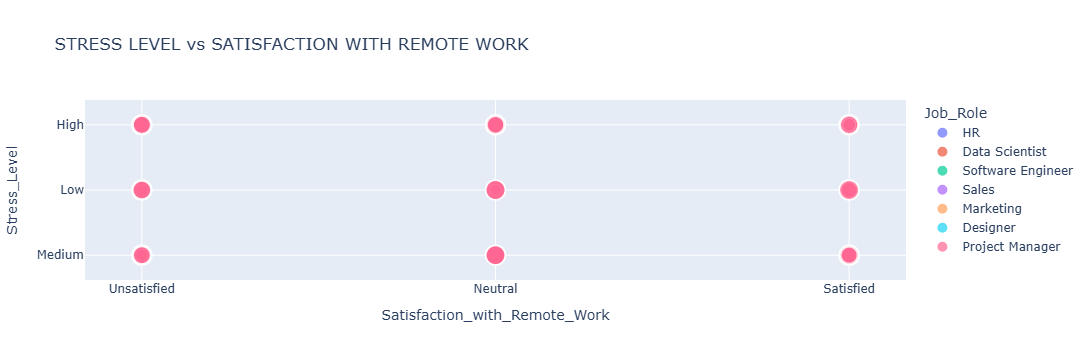

In [53]:
# ADD A FILTERABLE SCATTER PLOT STRESS LEVEL vs SATISFACTION WITH REMOTE WORK
fig = px.scatter(
    data,
    'Satisfaction_with_Remote_Work',
    y='Stress_Level',
    color='Job_Role',
    size='Hours_Worked_Per_Week',   # <-- comma was missing here
    title='STRESS LEVEL vs SATISFACTION WITH REMOTE WORK',
    hover_name='Employee_ID'
)

fig.update_layout(legend_title_text='Job_Role')
fig.show()


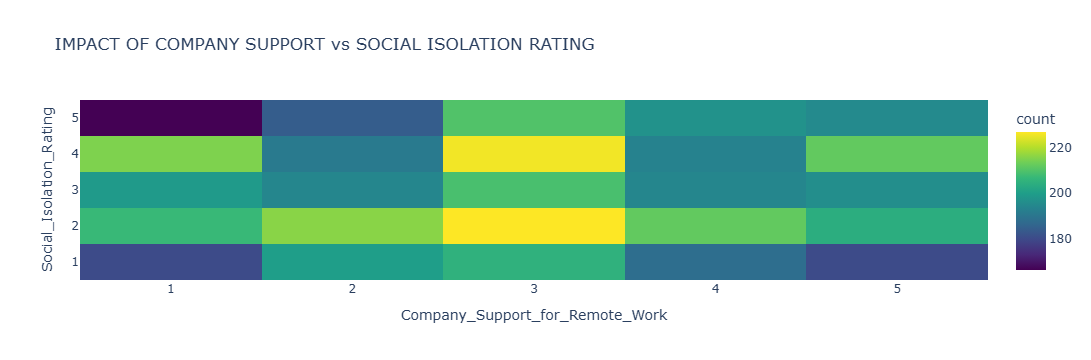

In [54]:
#CREATE A HEATMAP:COMPANY SUPPORT vs SOCIAL ISOLATION RATING
fig=px.density_heatmap(data,x='Company_Support_for_Remote_Work',y='Social_Isolation_Rating',
                       title="IMPACT OF COMPANY SUPPORT vs SOCIAL ISOLATION RATING",
                       color_continuous_scale='viridis')
fig.show()

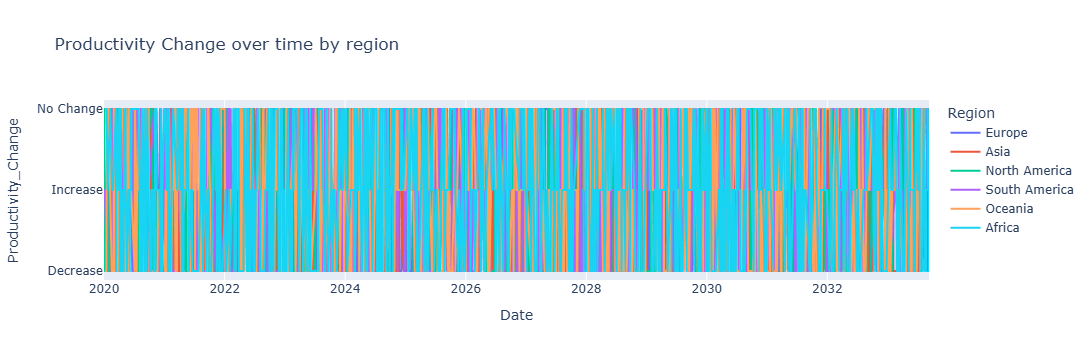

In [55]:
#ADD A LINE CHART: PRODUCTIVITY CHANGE OVER TIME BY REGION
data['Date']=pd.date_range(start='2020-01-01',periods=len(data),freq='D')
fig=px.line(data,x='Date',y='Productivity_Change',color='Region',
            title="Productivity Change over time by region")
fig.show()

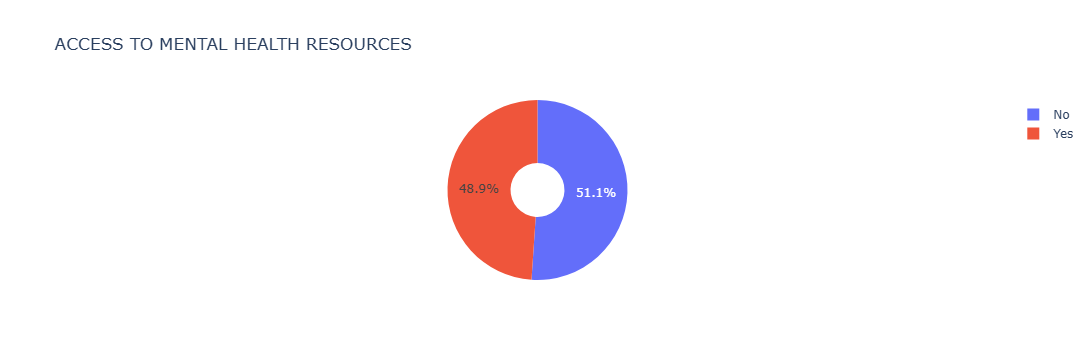

In [56]:
#CREATE A PIE CHART: ACCESS TO MENTAL HEALTH RESOURCES
fig=px.pie(data,names='Access_to_Mental_Health_Resources',
           title="ACCESS TO MENTAL HEALTH RESOURCES",
           hole=0.3)
fig.show()

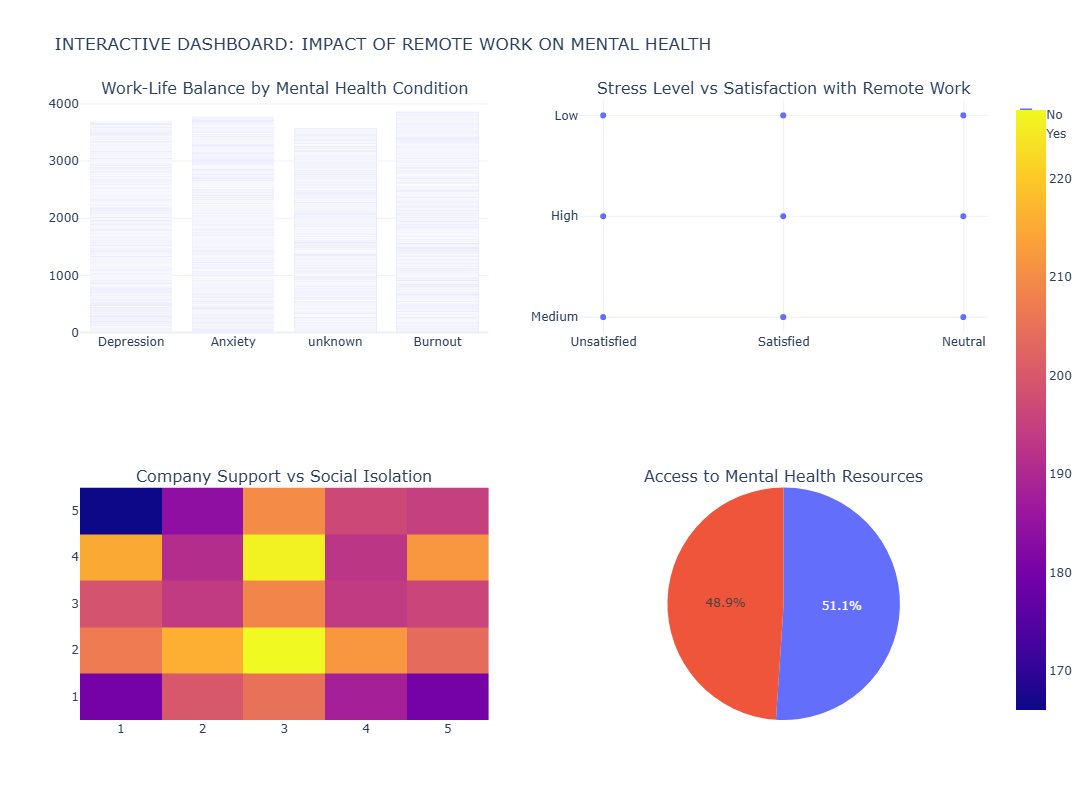

In [57]:
# COMBINE VISUALIZATIONS IN A DASHBOARD LAYOUT

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


# If Date column is not present, create it
if 'Date' not in data.columns:
    data['Date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')

# CREATE SUBPLOTS LAYOUT
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Work-Life Balance by Mental Health Condition",
        "Stress Level vs Satisfaction with Remote Work",
        "Company Support vs Social Isolation",
        "Access to Mental Health Resources"
    ),
    specs=[
        [{"type": "xy"}, {"type": "xy"}],
        [{"type": "xy"}, {"type": "domain"}]   # domain is needed for pie chart
    ]
)

# 1. FIRST CHART (BAR)

bar_fig = px.bar(
    data,
    x='Mental_Health_Condition',
    y='Work_Life_Balance_Rating'
).data[0]

fig.add_trace(bar_fig, row=1, col=1)


# 2. SECOND CHART (SCATTER)

scatter_fig = px.scatter(
    data,
    x='Satisfaction_with_Remote_Work',
    y='Stress_Level'
).data[0]

fig.add_trace(scatter_fig, row=1, col=2)


# 3. THIRD CHART (HEATMAP)

heatmap_fig = px.density_heatmap(
    data,
    x='Company_Support_for_Remote_Work',
    y='Social_Isolation_Rating'
).data[0]

fig.add_trace(heatmap_fig, row=2, col=1)


# 4. FOURTH CHART (PIE)

pie_fig = px.pie(
    data,
    names='Access_to_Mental_Health_Resources'   # <-- Correct column name
).data[0]

fig.add_trace(pie_fig, row=2, col=2)


# UPDATE LAYOUT

fig.update_layout(
    title_text="INTERACTIVE DASHBOARD: IMPACT OF REMOTE WORK ON MENTAL HEALTH",
    height=800,
    showlegend=True,
    template='plotly_white'
)

# SHOW DASHBOARD
fig.show()


In [58]:
#SAVE AND SHARE THE DASHBOARD
fig.write_html("interactive_dashboards.html")

In [1]:
import webbrowser
webbrowser.open("interactive_dashboards.html")


True